# Project: A/B Testing
by Eudora Fong A15598207

### Abstract
It is a common stereotype that UCSD prioritizes STEM students over humanity majors, which can be somewhat validated through UCSD's expenditure report data (see https://blink.ucsd.edu/finance/accounting/schedules.html for more information). However, do STEM students feel this prioritization? Does major correlate to the degree that students feel supported by university spending?

- Assumptions: We are assuming that in general, student experiences with other univerisity-funded services beyond academics are similar and do not significantly affect the data.
- Null hypothesis: Major has nothing to do with how students feel about UCSD tuition expenditure; it is random and is based on an individual's personal experience rather than just major type.
- Alternate hypothesis: Major is related to how students feel about UCSD tuition expenditure; STEM students feel more supported by the university than non STEM students.
- Admittedly, the sample size is small. In some ways, it can be considered a random sample because DOC3 is a class taken by all Marshall College STEM and non STEM majors as part of their college's writing general education requirements. However, with a much larger sample size, the resulting data analysis would be much more accurate and demonstrative.

### Data
The data for this data analysis comes from data I collected for my DOC3 project last year. In that project, I explored the contrast between the ways students think about university funding and the reality of where funding is allocated. Part of my project included a Marshall college-wide survey about the ways in which students feel that their needs and interests are being supported by university funding.
- The survey can be found here: https://docs.google.com/forms/d/1M-HvbqzpLGksUD3mP9UySZJPSWNbNh0kxDncjb7iEp8/edit?usp=sharing
- More information about my DOC3 project can be found here: https://drive.google.com/file/d/1HvIUVIt-TFOVPsn1ZoZZUU4keuiN2ATz/view?usp=sharing

I decided to use the data from the following survey questions:
1. Currently, student tuition makes up almost half of the university's revenue. As a part of the largest collective stakeholder of the university, I feel represented in and agree with the university's budget decision-making process.
2. I feel that the university is productively utilizing my tuition to support me, my major, and the groups I identify with (race, gender, sexuality, class, citizenship status, etc.).

Both of these questions asked the participant to answer using a rating on a scale from 1 - 5, where 1 meant 'Strongly Disagree' and 5 meant 'Strongly Agree,' which allows me to quanitify how students felt. I then added together the data from each question to create a collective score on a scale of 1-10 (where 1 = 'Not Supported' and 10 = 'Fully Supported') that describes the level of support students feel the university provides for them through its monetary expenditures. The first of these questions is included in the score because it describes to what degree students feel that their needs and interests are being heard and valued by the university specifically through its budgeting scheme. The second is included because it quantifies how supported students feel overall by the quantity and quality of services being provided by UCSD.

### Analysis Overview
To analyze the data, I will be using A/B testing to determine whether the STEM major group and the Non STEM major group come from the same fundamental distribution. 
- Since my alternate hypothesis is that STEM students feel more supported by the university than non STEM students, it is expected that on average, STEM students will exhibit a higher Support Score than non STEM students. I will use the difference between the Non STEM group score average and the STEM group score average as the test statistic.
- Since my null hypothesis is that the Support Scores are random and do not correlate with the type of major a student is pursuing, I should be able to randomly assign a major type to each score from the table and produce a similar test statistic value. Because of the variability of randomly assigning major types, I simulated it many times.
- To compare the results between the observed and simulated test statistics, I created a histogram visualization and found the empirical P-value to determine the statistical significance of any differences between the two test statistics.
- I used what I learned from COGS 18 and DSC 10 to create this project; the test functions formatted by those from COGS 18 assignments.

In [1]:
from my_module.functions import *
import numpy as np
from datascience import *
import random
import math
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [2]:
#importing and paring down the data
dataset = Table.read_table('responses.csv')
dataset = dataset.select(3, 4, 6)
dataset = dataset.where('What is your major?', are.not_equal_to('Sample Answer'))

#isolation of major column
by_major = dataset.column(0)

#creates an array of major type labels
majors_cap = capitalize(by_major)
new_colm = major_type(majors_cap)

#adds new column categorizing each major into STEM and Non STEM
dataset = dataset.with_column('Major Type', new_colm).select(0, 3, 1, 2)

#creates table with Support Score
support_table = support_score_table(dataset, 2, 3)

#calculates observed test statistic
observed_stat = difference_of_avg(support_table, 'Support Score', 'Major Type')
print("Observed Test Statistic:", observed_stat)

Observed Test Statistic: -0.7282608695652177


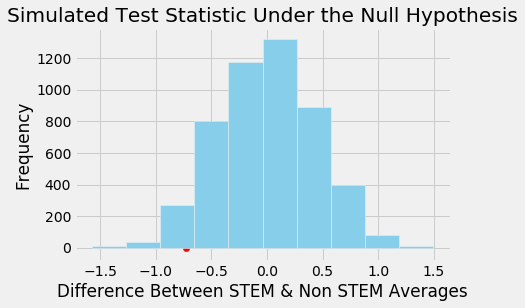

In [3]:
#randomizes major type and simulates new test statistics
simulated_test_stat = ()
repetitions = 5000
for i in np.arange(repetitions):
    new_stat = one_sim_stat(support_table, 'Support Score', 'Major Type')
    simulated_test_stat = np.append(simulated_test_stat, new_stat)

#visualization of observed test statistic (red dot) and the simulated test statistics
n, bins, patches = plt.hist(simulated_test_stat, facecolor = 'skyblue')
plt.xlabel('Difference Between STEM & Non STEM Averages')
plt.ylabel('Frequency')
plt.title(r'Simulated Test Statistic Under the Null Hypothesis')
plt.scatter(observed_stat, 0, color='red', s=40)
plt.show()

It can be noticed that the observed test statistic is within the scale of the histogram's data, but not as close to the mean of the simulated test statistics as one might like. We can calculate the the empirical P-value to see if the variation between the test and simulated test statistics is statistically significant. If the p-value is less than 0.05, we can reject the null hypothesis that there is no difference between the averages and conclude that a significant difference does exist.

In [4]:
#calculates p-value
empirical_P_val = np.count_nonzero(simulated_test_stat <= observed_stat) / 5000
print("p-value:",empirical_P_val)

p-value: 0.0636


### Conclusion
From the histogram, the observed value of the statistic and the predicted behavior of the statistic under the null hypothesis are consistent. The data favor the null over the alternate hypothesis. The empirical P-value is about 0.07, which is greater than 0.05, meaning that the resulting difference between the observed and simulated statistics is not statistically significant. The test supports the hypothesis that the type of major that students pursue does not affect how supported they feel by the university. Additionally, based on the generally low Support Scores all across the board, all students - regardless of their major - unfortunately do not feel that their needs and interests are being fully served by the university's allocation of funding.

# Extra Credit
For this project, what was difficult for me was incorporating A/B testing into my project. I had learned A/B testing briefly before in DSC 10, however, everything had been made simple and when it was necessary, the directions would directly instruct me to use it. Deciding myself how to analyze my specific dataset and what kind of test statistic to use was very different and was definitely a learning experience. It took a lot of research to understand which analysis method was right for my dataset and my purpose. In the end, I settled on A/B testing because my data had two categories that I could compare and fit my interest in seein the relationship between types of majors and student sentiment towards university spending. I also took this opportunity to relearn and re-understand the fundamental concept of A/B testing as well as the coding that is required. I learned how to randomly select major types for each Support Score to simulate another sample under the null hypothesis. By testing the dataset against arbitrarily created samples, we can better understand the underlying distribution of the observed data and whether it follows random chance or if there is a factor driving the data. In addition to the basic skills of creating loops, conditional statements, and functions, I needed to employ table methods, plots, and permutations in order to analyze my data. Plots in particular I had to research because I am not too familiar with matplotlib, specifically the stylistic elements of making a histogram. Overall, I enjoyed challenging myself and being fully involved in the data analysis process, from the data collection to the ending analysis and conclusion, as well as learning new methods along the way through trial and error. Thank you for an awesome quarter!